<a href="https://colab.research.google.com/github/ghanshyam17/gsportfolio/blob/master/NetflixProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import missingno as msno
from operator import itemgetter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My Data file/netflix_titles.csv')
length = len(df)

Creating a copy for recommendation

In [ ]:
netflix_df = df.copy()

In [ ]:
print("Length of the dataset is : "+str(len(df)))
df.head()

Length of the dataset is : 7787


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

"""for i in range (0,length):
  df['date_added'][i] = df['date_added'][i].date()

df['date_added']"""
#df['release_year'] = pd.to_datetime(df['release_year'])

"for i in range (0,length):\n  df['date_added'][i] = df['date_added'][i].date()\n\ndf['date_added']"

In [ ]:
least_recently_added = df['date_added'].min()
most_recently_added = df['date_added'].max()

least_release_year = df['release_year'].min()
most_recent_release = df['release_year'].max()

print("The dataset contains netflix content added from the date "+str(least_recently_added.date())+" to "+str(most_recently_added.date()))
print("This dataset contains netflix content released from the year "+str(least_release_year)+" to "+str(most_recent_release))


The dataset contains netflix content added from the date 2008-01-01 to 2021-01-16
This dataset contains netflix content released from the year 1925 to 2021


In [ ]:
"""msno.matrix(df);
print(df.isnull().sum()*100/len(movies))"""

'msno.matrix(df);\nprint(df.isnull().sum()*100/len(movies))'

In [ ]:
df1 = df.copy()
df2 = df.copy()

movies = pd.DataFrame(columns=['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'])
shows = pd.DataFrame(columns=['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'])

df1.drop(df1.loc[df1['type']=='Movie'].index, inplace=True)
shows = df1
df2.drop(df2.loc[df2['type']=='TV Show'].index, inplace=True)
movies = df2

show_id         0.000000
type            0.000000
title           0.000000
director        3.031430
cast            7.922633
country         4.277478
date_added      0.000000
release_year    0.000000
rating          0.092989
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64


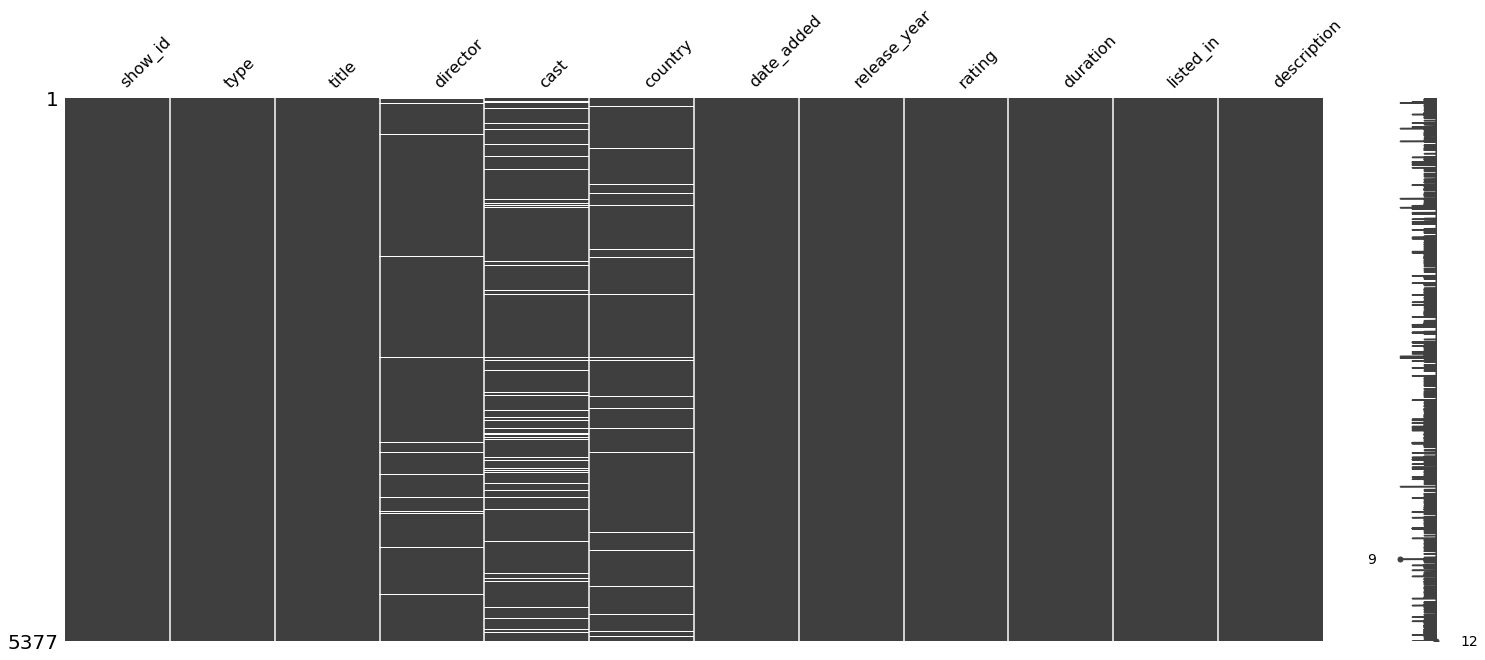

In [ ]:
msno.matrix(movies);
print(movies.isnull().sum()*100/len(movies))

show_id          0.000000
type             0.000000
title            0.000000
director        41.398549
cast             5.430537
country          5.151572
date_added       0.185977
release_year     0.000000
rating           0.037195
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


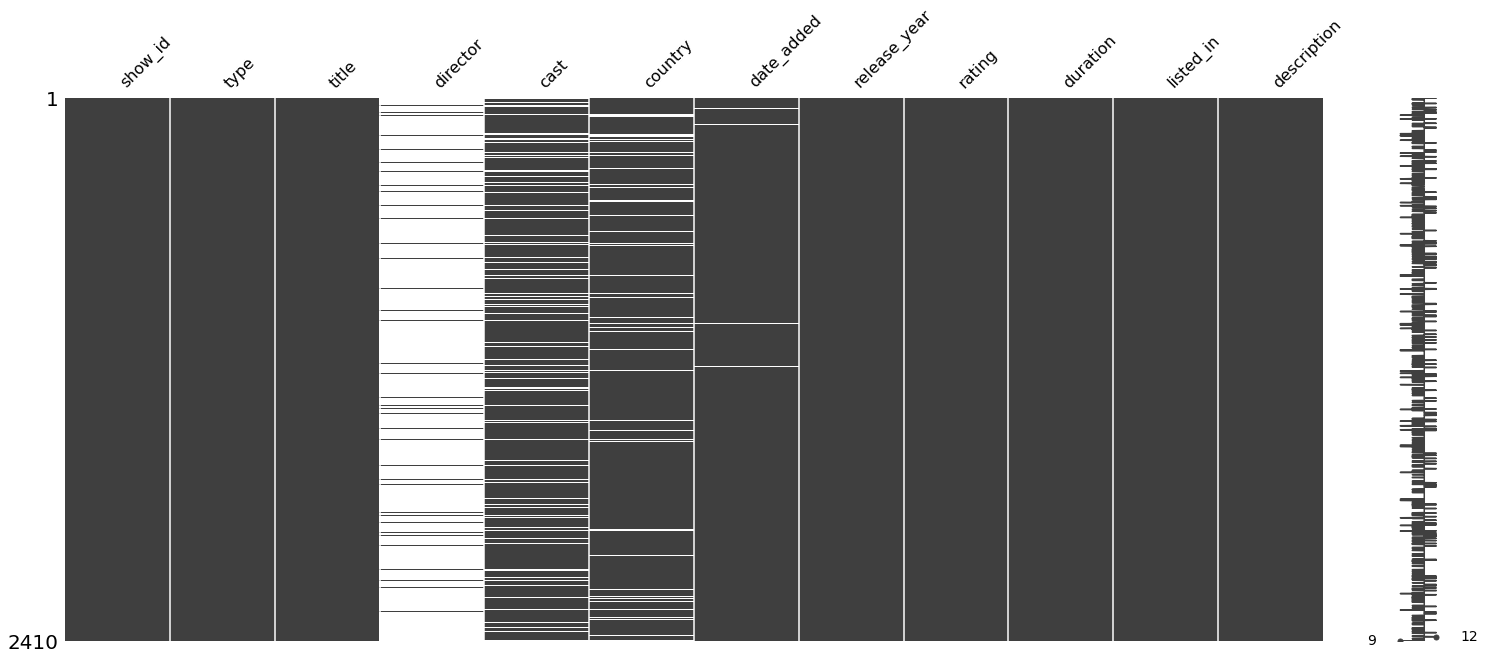

In [ ]:
msno.matrix(shows);
print(shows.isnull().sum()*100/len(movies))

In [ ]:
movies.director.fillna('NA', inplace=True)
movies.cast.fillna('NA', inplace=True)
movies.country.fillna('NA', inplace=True)
movies.rating.fillna('NA', inplace=True)

shows.date_added.fillna('NA', inplace=True)
shows.director.fillna('NA', inplace=True)
shows.cast.fillna('NA', inplace=True)
shows.country.fillna('NA', inplace=True)
shows.rating.fillna('NA', inplace=True)

df.date_added.fillna('NA', inplace=True)
df.director.fillna('NA', inplace=True)
df.cast.fillna('NA', inplace=True)
df.country.fillna('NA', inplace=True)
df.rating.fillna('NA', inplace=True)


# Exploratory Data Analysis


In [ ]:
movies.head(0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
shows.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NA,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


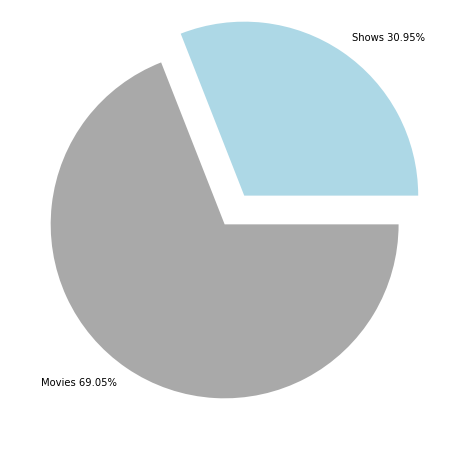

In [ ]:
y = np.array([len(shows),len(movies)])
plt.figure(figsize=(8,8))
pltlabels = ["Shows "+str("{:.2f}".format(len(shows)*100/length))+"%", "Movies "+str("{:.2f}".format(len(movies)*100/length))+"%"]
pltexplode = [0.2, 0]
pltcolors = ['lightblue','darkgrey']
plt.pie(y, labels = pltlabels, explode = pltexplode, colors = pltcolors)
plt.show;

In [ ]:
casting = []
casting_m = []
casting_s = []

def get_dict_cast (casting):
  casting_list = np.unique(casting)
  casting_dict = {}

  for cast in casting_list:
    count = casting.count(cast)
    casting_dict[cast] = count

  dic = dict(sorted(casting_dict.items(), key = itemgetter(1), reverse = True)[:20])
  del dic['NA']
  return dic

for i in range(0,length):
  cast = df['cast'][i]
  names = cast.split(',')
  for name in names:
    casting.append(name)
    if df['type'][i] == 'TV Show':
      casting_s.append(name)
    elif df['type'][i] == 'Movie': 
      casting_m.append(name)


movies_cast_dictionary = get_dict_cast(casting_m)
shows_cast_dictionary = get_dict_cast(casting_s)
cast_dictionary = get_dict_cast(casting)


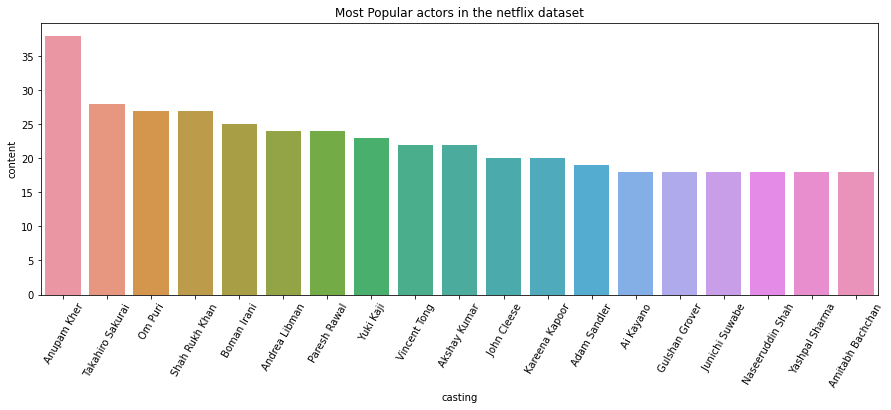

In [ ]:
cd = pd.DataFrame.from_dict(cast_dictionary, orient = 'index')
mcd = pd.DataFrame.from_dict(movies_cast_dictionary, orient = 'index')
scd = pd.DataFrame.from_dict(shows_cast_dictionary, orient = 'index')

plt.figure(figsize=(15,5))
castplot = sns.barplot(data=cd, x=cd.index, y=cd[0])
castplot.set(xlabel="casting", ylabel = "content", title = 'Most Popular actors in the netflix dataset')
plt.xticks(rotation=60);

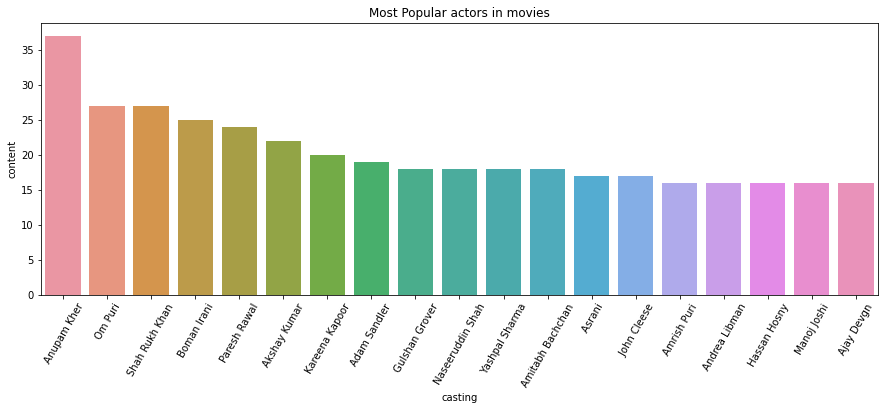

In [ ]:
plt.figure(figsize=(15,5))
mcastplot = sns.barplot(data=mcd, x=mcd.index, y=mcd[0])
mcastplot.set(xlabel="casting", ylabel = "content", title = 'Most Popular actors in movies')
plt.xticks(rotation=60);

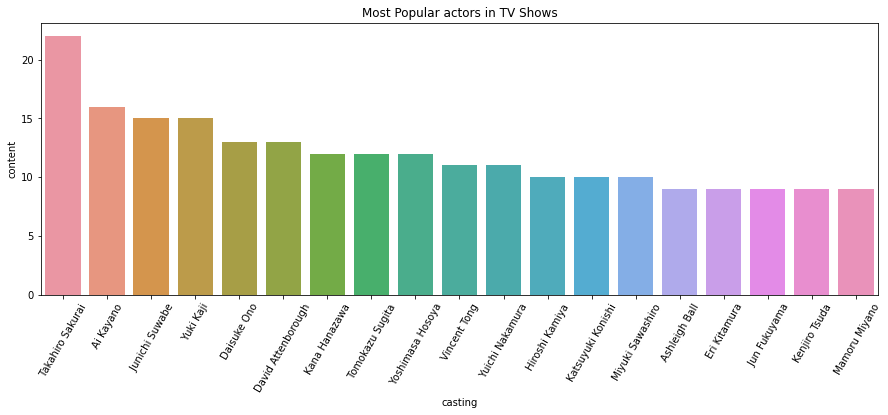

In [ ]:
plt.figure(figsize=(15,5))
scastplot = sns.barplot(data=scd, x=scd.index, y=scd[0])
scastplot.set(xlabel="casting", ylabel = "content", title = 'Most Popular actors in TV Shows')
plt.xticks(rotation=60);

In [ ]:
directors = []
directors_m = []
directors_s = []

def get_dict_director (directors):
  directors_list = np.unique(directors)
  directors_dict = {}

  for director in directors_list:
    count = directors.count(director)
    directors_dict[director] = count

  dic = dict(sorted(directors_dict.items(), key = itemgetter(1), reverse = True)[:20])
  del dic['NA']
  return dic

for i in range(0,length):
  director = df['director'][i]
  names = director.split(',')
  for name in names:
    directors.append(name)
    if df['type'][i] == 'TV Show':
      directors_s.append(name)
    elif df['type'][i] == 'Movie': 
      directors_m.append(name)


movies_director_dictionary = get_dict_director(directors_m)
shows_director_dictionary = get_dict_director(directors_s)
director_dictionary = get_dict_director(directors)

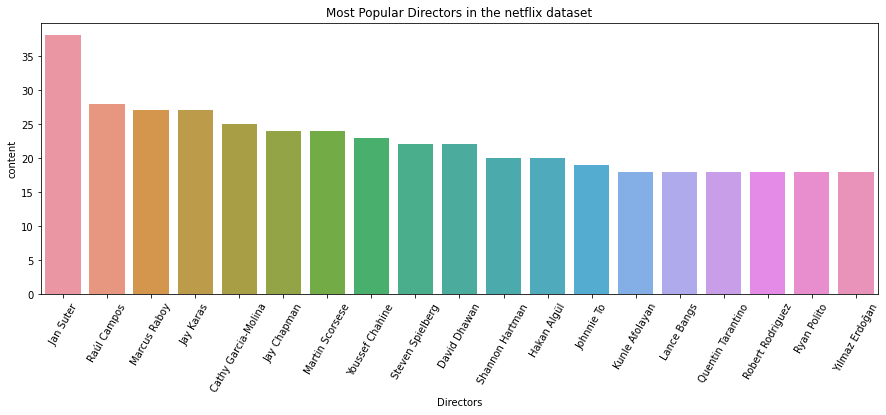

In [ ]:
dd = pd.DataFrame.from_dict(director_dictionary, orient = 'index')
mdd = pd.DataFrame.from_dict(movies_director_dictionary, orient = 'index')
sdd = pd.DataFrame.from_dict(shows_director_dictionary, orient = 'index')

plt.figure(figsize=(15,5))
castplot = sns.barplot(data=dd, x=dd.index, y=cd[0])
castplot.set(xlabel="Directors", ylabel = "content", title = 'Most Popular Directors in the netflix dataset')
plt.xticks(rotation=60);

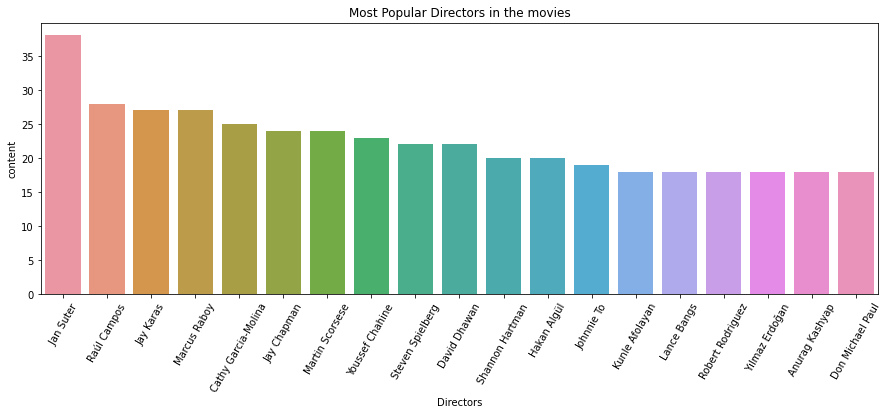

In [ ]:
plt.figure(figsize=(15,5))
castplot = sns.barplot(data=mdd, x=mdd.index, y=cd[0])
castplot.set(xlabel="Directors", ylabel = "content", title = 'Most Popular Directors in the movies')
plt.xticks(rotation=60);

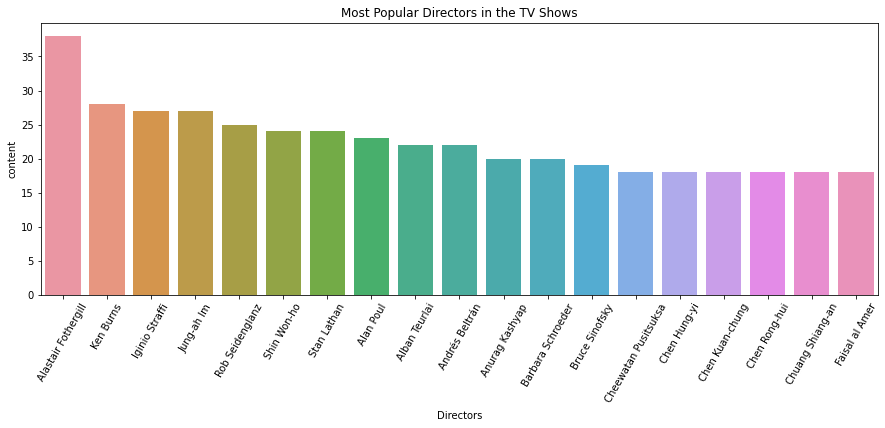

In [ ]:
plt.figure(figsize=(15,5))
castplot = sns.barplot(data=sdd, x=sdd.index, y=cd[0])
castplot.set(xlabel="Directors", ylabel = "content", title = 'Most Popular Directors in the TV Shows')
plt.xticks(rotation=60);

In [ ]:
genres = []
genres_m = []
genres_s = []

def get_dict_genre (genres):
  genres_list = np.unique(genres)
  genres_dict = {}

  for genre in genres_list:
    count = genres.count(genre)
    genres_dict[genre] = count

  dic = dict(sorted(genres_dict.items(), key = itemgetter(1), reverse = True)[:20])
  #del dic['NA']
  return dic

for i in range(0,length):
  genre = df['listed_in'][i]
  names = genre.split(',')
  for name in names:
    genres.append(name)
    if df['type'][i] == 'TV Show':
      genres_s.append(name)
    elif df['type'][i] == 'Movie': 
      genres_m.append(name)


movies_genre_dictionary = get_dict_genre(genres_m)
shows_genre_dictionary = get_dict_genre(genres_s)
genre_dictionary = get_dict_genre(genres)

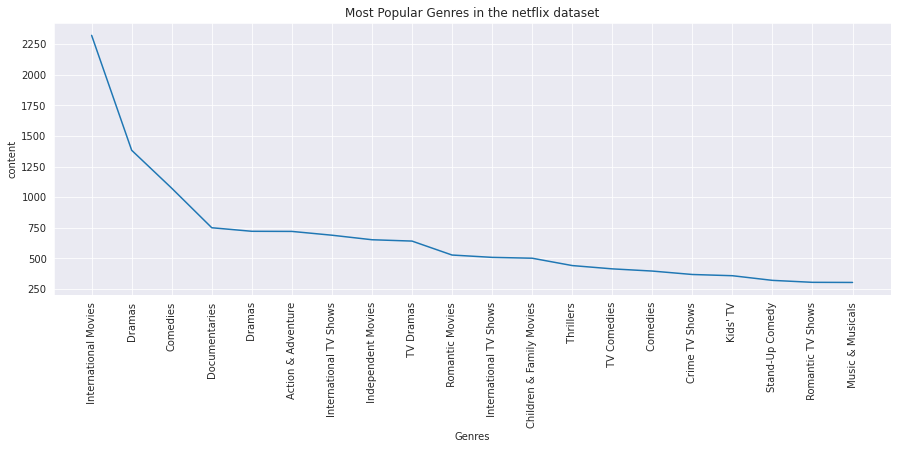

In [ ]:
gd = pd.DataFrame.from_dict(genre_dictionary, orient = 'index')
mgd = pd.DataFrame.from_dict(movies_genre_dictionary, orient = 'index')
sgd = pd.DataFrame.from_dict(shows_genre_dictionary, orient = 'index')

sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
genreplot = sns.lineplot(data=gd, x=gd.index, y=gd[0])
genreplot.set(xlabel="Genres", ylabel = "content", title = 'Most Popular Genres in the netflix dataset')
plt.xticks(rotation=90);

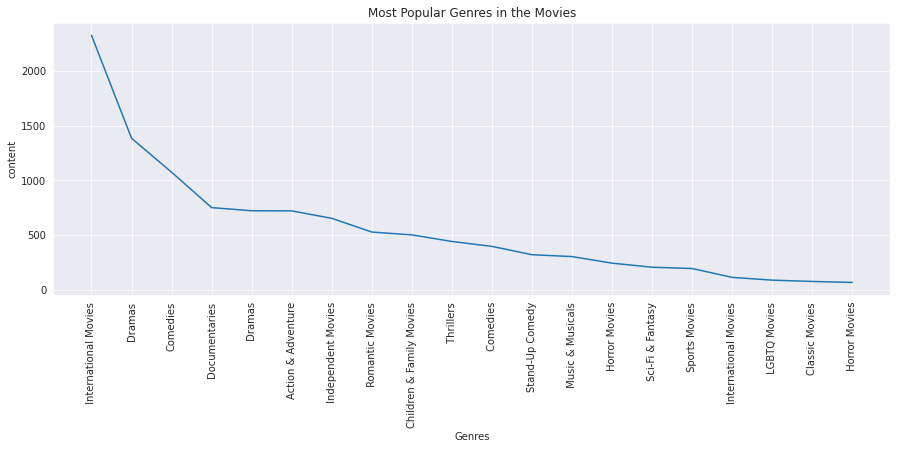

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
genreplot = sns.lineplot(data=mgd, x=mgd.index, y=mgd[0])
genreplot.set(xlabel="Genres", ylabel = "content", title = 'Most Popular Genres in the Movies')
plt.xticks(rotation=90);

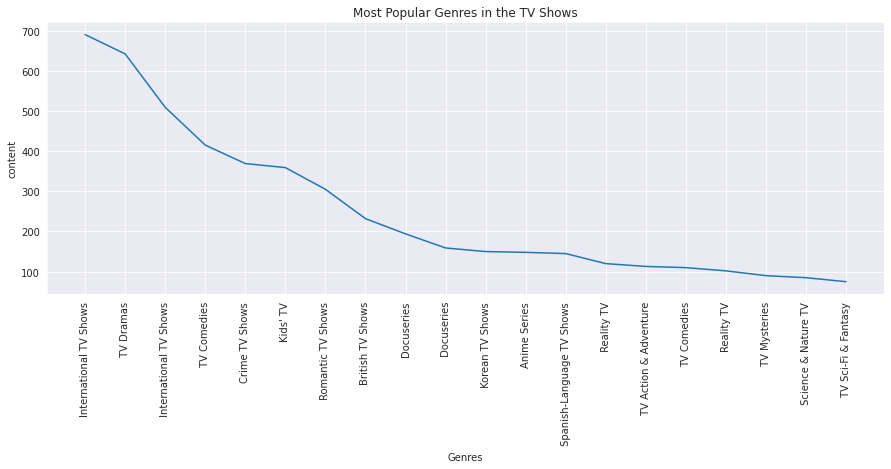

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
genreplot = sns.lineplot(data=sgd, x=sgd.index, y=sgd[0])
genreplot.set(xlabel="Genres", ylabel = "content", title = 'Most Popular Genres in the TV Shows')
plt.xticks(rotation=90);

In [ ]:
ydates = []
ydates_m = []
ydates_s = []

mdates = []
mdates_m = []
mdates_s = []

initial = []


def get_dict_date (dates):
  dates_list = np.unique(dates)
  dates_dict = {}

  for date in dates_list:
    count = dates.count(date)
    dates_dict[date] = count

  dic = dict(sorted(dates_dict.items(), key = itemgetter(1), reverse = True)[:20])
  #del dic['NA']
  return dic



for i in range(0,length):
  datime = df['date_added'][i]
  day = str(datime)
  sep = ' '
  day = day.split(sep, 1)[0]
  if day == "NA":
    pass
  else:
    day = datetime.strptime(day, '%Y-%m-%d')
    month = str(day.strftime("%B"))
    year = str(day.strftime("%Y"))
  ydates.append(year)
  if df['type'][i] == 'TV Show':
    ydates_s.append(year)
  elif df['type'][i] == 'Movie': 
    ydates_m.append(year)
  mdates.append(month)
  if df['type'][i] == 'TV Show':
    mdates_s.append(month)
  elif df['type'][i] == 'Movie': 
    mdates_m.append(month)

movies_year_dictionary = get_dict_date(ydates_m)
shows_year_dictionary = get_dict_date(ydates_s)
year_date_dictionary = get_dict_date(ydates)

movies_month_dictionary = get_dict_date(mdates_m)
shows_month_dictionary = get_dict_date(mdates_s)
month_date_dictionary = get_dict_date(mdates)

In [ ]:
print(month_date_dictionary)

{'December': 833, 'October': 786, 'January': 757, 'November': 738, 'March': 670, 'August': 620, 'September': 619, 'April': 602, 'July': 601, 'May': 545, 'June': 543, 'February': 473}


In [ ]:
ydd = pd.DataFrame.from_dict(year_date_dictionary, orient = 'index')
myd = pd.DataFrame.from_dict(movies_year_dictionary, orient = 'index')
syd = pd.DataFrame.from_dict(shows_year_dictionary, orient = 'index')

mdd = pd.DataFrame.from_dict(month_date_dictionary, orient = 'index')
mmd = pd.DataFrame.from_dict(movies_month_dictionary, orient = 'index')
smd = pd.DataFrame.from_dict(shows_month_dictionary, orient = 'index')

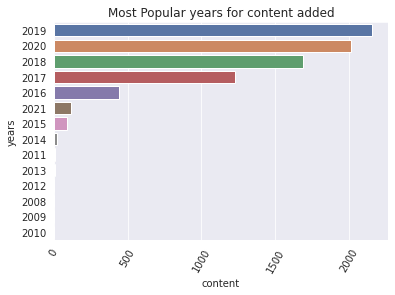

In [ ]:

dateplot = sns.barplot(data=ydd, y=ydd.index, x=ydd[0],palette="deep")
dateplot.set(xlabel="content", ylabel = "years", title = 'Most Popular years for content added')
plt.xticks(rotation=60);

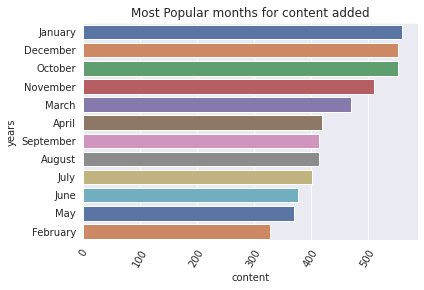

In [ ]:
monthplot = sns.barplot(data=mmd, y=mmd.index, x=mmd[0],palette="deep")
monthplot.set(xlabel="content", ylabel = "years", title = 'Most Popular months for content added')
plt.xticks(rotation=60);


In [ ]:
country_df = df['country'].value_counts().reset_index()
country_df = country_df[country_df['country'] /  country_df['country'].sum() > 0.01]

fig = px.pie(country_df, values='country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
years = []
years_m = []
years_s = []

def get_dict_year (years):
  years_list = np.unique(years)
  years_dict = {}

  for year in years_list:
    count = years.count(year)
    years_dict[year] = count

  dic = dict(sorted(years_dict.items(), key = itemgetter(1), reverse = True)[:20])
  #del dic['NA']
  return dic

for i in range(0,length):
  year = df['release_year'][i]
  years.append(year)
  if df['type'][i] == 'TV Show':
    years_s.append(year)
  elif df['type'][i] == 'Movie': 
    years_m.append(year)


movies_year_dictionary = get_dict_year(years_m)
shows_year_dictionary = get_dict_year(years_s)
year_dictionary = get_dict_year(years)

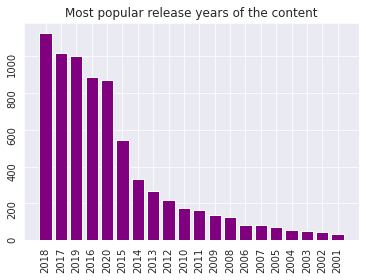

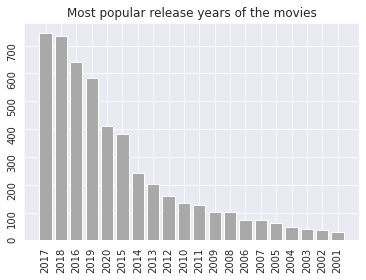

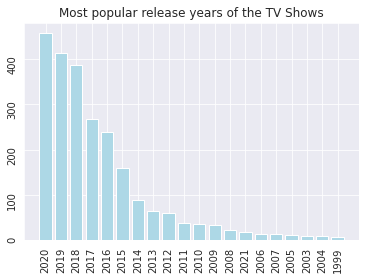

In [ ]:
plt.bar(range(len(year_dictionary)), list(year_dictionary.values()), align='center', color='purple')
plt.xticks(range(len(year_dictionary)), list(year_dictionary.keys()))
plt.tick_params(labelrotation=90)
plt.title("Most popular release years of the content")
plt.show()

plt.bar(range(len(movies_year_dictionary)), list(movies_year_dictionary.values()), align='center', color='darkgrey')
plt.xticks(range(len(movies_year_dictionary)), list(movies_year_dictionary.keys()))
plt.tick_params(labelrotation=90)
plt.title("Most popular release years of the movies")
plt.show()

plt.bar(range(len(shows_year_dictionary)), list(shows_year_dictionary.values()), align='center', color='lightblue')
plt.xticks(range(len(shows_year_dictionary)), list(shows_year_dictionary.keys()))
plt.tick_params(labelrotation=90)
plt.title("Most popular release years of the TV Shows")
plt.show()

In [ ]:
ratings = []
ratings_m = []
ratings_s = []

def get_dict_rating (ratings):
  ratings_list = np.unique(ratings)
  ratings_dict = {}

  for rating in ratings_list:
    count = ratings.count(rating)
    ratings_dict[rating] = count

  dic = dict(sorted(ratings_dict.items(), key = itemgetter(1), reverse = True)[:20])
  #del dic['NA']
  return dic

for i in range(0,length):
  rating = df['rating'][i]
  ratings.append(rating)
  if df['type'][i] == 'TV Show':
    ratings_s.append(rating)
  elif df['type'][i] == 'Movie': 
    ratings_m.append(rating)


movies_rating_dictionary = get_dict_rating(ratings_m)
shows_rating_dictionary = get_dict_rating(ratings_s)
rating_dictionary = get_dict_rating(ratings)

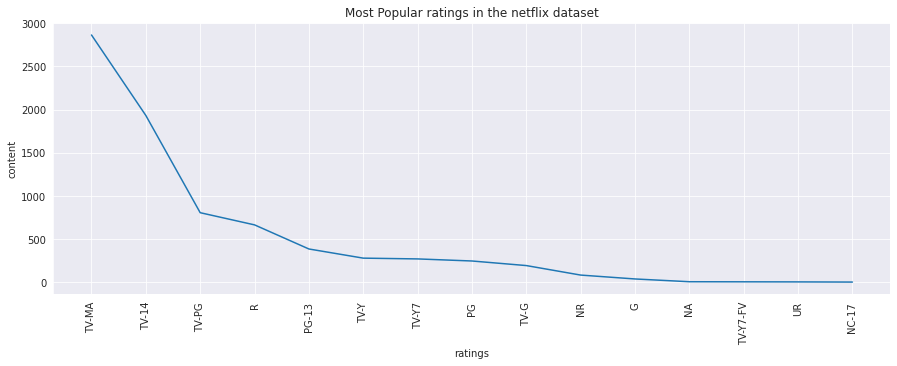

In [ ]:
rd = pd.DataFrame.from_dict(rating_dictionary, orient = 'index')
mrd = pd.DataFrame.from_dict(movies_rating_dictionary, orient = 'index')
srd = pd.DataFrame.from_dict(shows_rating_dictionary, orient = 'index')


plt.figure(figsize=(15,5))
ratingplot = sns.lineplot(data=rd, x=rd.index, y=rd[0])
ratingplot.set(xlabel="ratings", ylabel = "content", title = 'Most Popular ratings in the netflix dataset')
plt.xticks(rotation=90);

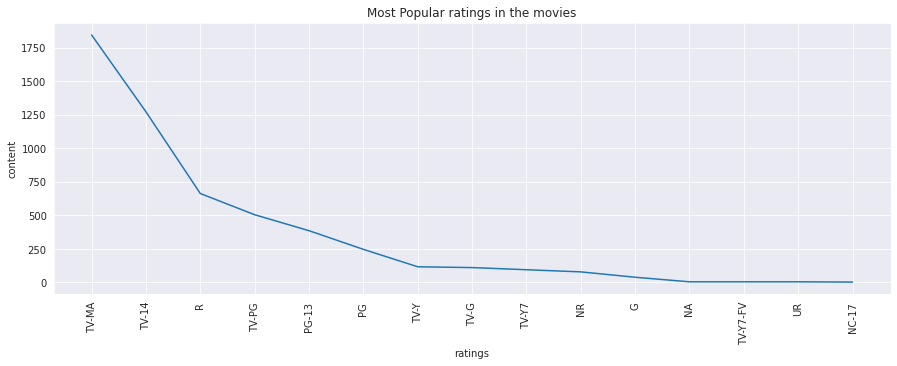

In [ ]:
plt.figure(figsize=(15,5))
ratingplot = sns.lineplot(data=mrd, x=mrd.index, y=mrd[0])
ratingplot.set(xlabel="ratings", ylabel = "content", title = 'Most Popular ratings in the movies')
plt.xticks(rotation=90);

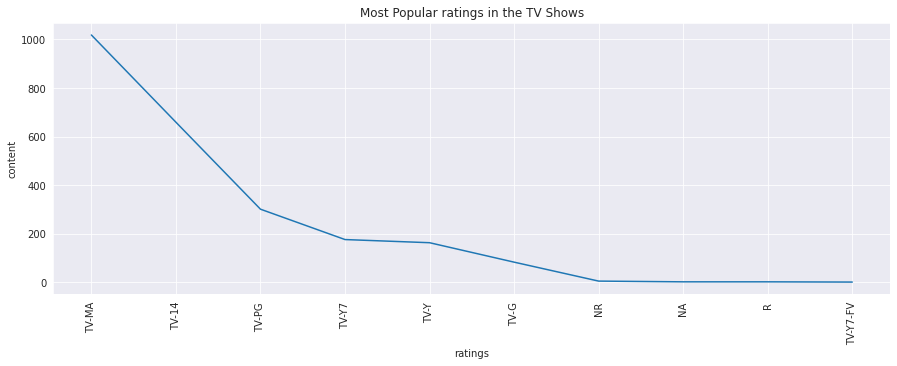

In [ ]:
plt.figure(figsize=(15,5))
ratingplot = sns.lineplot(data=srd, x=srd.index, y=srd[0])
ratingplot.set(xlabel="ratings", ylabel = "content", title = 'Most Popular ratings in the TV Shows')
plt.xticks(rotation=90);

In [ ]:
#time = []
times_m = []
times_s = []

def get_dict_rating (times):
  times_list = np.unique(times)
  times_dict = {}

  for time in times_list:
    count = times.count(time)
    times_dict[time] = count

  dic = dict(sorted(times_dict.items(), key = itemgetter(1), reverse = True)[:20])
  #del dic['NA']
  return dic

for i in range(0,length):
  time = df['duration'][i]
  #times.append(time)
  if df['type'][i] == 'TV Show':
    times_s.append(time)
  elif df['type'][i] == 'Movie': 
    times_m.append(time)


movies_time_dictionary = get_dict_rating(times_m)
shows_time_dictionary = get_dict_rating(times_s)
#rating_dictionary = get_dict_rating(ratings)

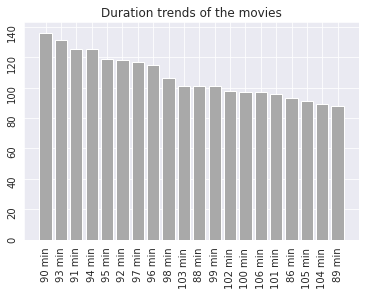

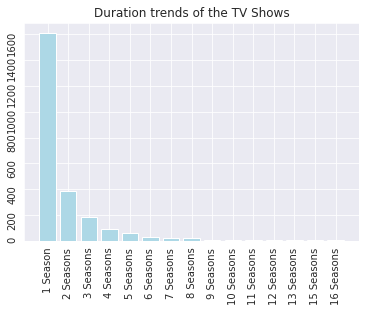

In [ ]:
plt.bar(range(len(movies_time_dictionary)), list(movies_time_dictionary.values()), align='center', color='darkgrey')
plt.xticks(range(len(movies_time_dictionary)), list(movies_time_dictionary.keys()))
plt.tick_params(labelrotation=90)
plt.title("Duration trends of the movies")
plt.show()

plt.bar(range(len(shows_time_dictionary)), list(shows_time_dictionary.values()), align='center', color='lightblue')
plt.xticks(range(len(shows_time_dictionary)), list(shows_time_dictionary.keys()))
plt.tick_params(labelrotation=90)
plt.title("Duration trends of the TV Shows")
plt.show()

**RECOMMENDATION SYSTEM**

Netflix heavily relies on recommendation system. It uses both content based and collaborative based recommendation. 

Now we will focus on content based recommendation of the content using nlp

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In content based recommendation, we will need Actors, Director, Description and Genre of the movie. We will combine these column and create a new one and add this column to the dataframe

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_df['director'] = netflix_df['director'].fillna('')
netflix_df['cast'] = netflix_df['cast'].fillna('')
netflix_df['listed_in'] = netflix_df['listed_in'].fillna('')
netflix_df['description'] = netflix_df['description'].fillna('')

In [ ]:
features = ['cast', 'listed_in', 'director', 'description']
for feature in features:
    netflix_df[feature] = netflix_df[feature].fillna('')

In [ ]:
def combined_features(row):
    return row['director']+ " " +row['cast']+ " " +row['listed_in']+ " " +row['description']
netflix_df["combined_features"] = netflix_df.apply(combined_features, axis =1)

In [ ]:
def preprocess(text):
    text = re.sub('[^A-z]', ' ', text)
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)  
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    filtered_sentence = []  
    for w in word_tokens:  
        if w not in stop_words:  
            filtered_sentence.append(lemmatizer.lemmatize(w))
    filtered = ' '.join([x for x in filtered_sentence])
    return filtered.lower().strip()

In [ ]:
netflix_df['combined_features'] = netflix_df['combined_features'].apply(lambda x : preprocess(x))

We will use count vectorizer from sklearn to create a matrix of word vectors. We then transform them to only consider numerical values.


In [ ]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(netflix_df["combined_features"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
cv1 = CountVectorizer(ngram_range=(1,2))
count_matrix1 = cv1.fit_transform(netflix_df["combined_features"])
print("Count Matrix:", count_matrix1.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
cv.vocabulary_

{'jo': 19336,
 'miguel': 25436,
 'bianca': 4505,
 'comparato': 8093,
 'michel': 25362,
 'gomes': 15120,
 'rodolfo': 33168,
 'valente': 41267,
 'vaneza': 41346,
 'oliveira': 28387,
 'rafael': 31517,
 'lozano': 23100,
 'viviane': 41941,
 'porto': 30600,
 'mel': 25034,
 'fronckowiak': 13964,
 'sergio': 35202,
 'mamberti': 23840,
 'zez': 43933,
 'motta': 26302,
 'celso': 6778,
 'frateschi': 13842,
 'international': 18345,
 'tv': 40590,
 'shows': 35980,
 'dramas': 10912,
 'sci': 34787,
 'fi': 13228,
 'fantasy': 12859,
 'in': 18025,
 'future': 14120,
 'elite': 11681,
 'inhabit': 18213,
 'island': 18572,
 'paradise': 29235,
 'far': 12864,
 'crowded': 8853,
 'slum': 36581,
 'get': 14679,
 'one': 28469,
 'chance': 6948,
 'join': 19416,
 'saved': 34525,
 'squalor': 37276,
 'jorge': 19491,
 'grau': 15373,
 'demi': 9745,
 'bichir': 4521,
 'ctor': 8902,
 'bonilla': 5086,
 'oscar': 28693,
 'serrano': 35224,
 'azalia': 3107,
 'ortiz': 28675,
 'octavio': 28156,
 'carmen': 6474,
 'beato': 3909,
 'movie

With the help of cosine similarity, we are able to find the similar words

In [ ]:
cosine_sim = cosine_similarity(count_matrix)

In [ ]:
cosine_sim1 = cosine_similarity(count_matrix1)

In [ ]:
movie_user_likes = "Stranger Things"
def get_index_from_title(title):
    return netflix_df[netflix_df.title == title].index[0]

movie_index = get_index_from_title(movie_user_likes)

check the index of the movie for recommendation

In [ ]:
movie_index

5836

Creating  list to store index and cosine similarity and sorting them in descending order




In [ ]:
similar_movies = list(enumerate(cosine_sim[movie_index]))

In [ ]:
similar_movies1 = list(enumerate(cosine_sim1[movie_index]))

In [ ]:
similar_movies1

[(0, 0.1464810889243214),
 (1, 0.0),
 (2, 0.03958844008177806),
 (3, 0.049485550102222574),
 (4, 0.0),
 (5, 0.10661297883234276),
 (6, 0.010018551496304803),
 (7, 0.009897110020444515),
 (8, 0.020289151931934327),
 (9, 0.010018551496304803),
 (10, 0.0),
 (11, 0.0750234484920533),
 (12, 0.07294866524160776),
 (13, 0.0),
 (14, 0.053504249208683054),
 (15, 0.017433538737949592),
 (16, 0.054372724782703684),
 (17, 0.021106489686678442),
 (18, 0.03043372789790149),
 (19, 0.013750333019910538),
 (20, 0.0),
 (21, 0.0),
 (22, 0.010553244843339221),
 (23, 0.011015647826027293),
 (24, 0.030433727897901486),
 (25, 0.0140817138826738),
 (26, 0.047088160934801115),
 (27, 0.011544696675305222),
 (28, 0.0),
 (29, 0.034079908829549845),
 (30, 0.0),
 (31, 0.010144575965967163),
 (32, 0.010144575965967163),
 (33, 0.009557679012135873),
 (34, 0.011183835382312353),
 (35, 0.0),
 (36, 0.01085482681709727),
 (37, 0.0),
 (38, 0.11015647826027293),
 (39, 0.009666913176095693),
 (40, 0.00906212079711728),
 (41

In [ ]:
similar_movies

[(0, 0.223606797749979),
 (1, 0.0),
 (2, 0.07479575920067658),
 (3, 0.057416925176321465),
 (4, 0.0),
 (5, 0.18232322463624387),
 (6, 0.018490006540840973),
 (7, 0.01891511969643836),
 (8, 0.03874194221130299),
 (9, 0.01891511969643836),
 (10, 0.0),
 (11, 0.14177184340737956),
 (12, 0.13819603191146362),
 (13, 0.0),
 (14, 0.062017367294604234),
 (15, 0.032857603872676285),
 (16, 0.09857281161802885),
 (17, 0.04078236951430929),
 (18, 0.05883484054145521),
 (19, 0.026444294267397254),
 (20, 0.0),
 (21, 0.0),
 (22, 0.020391184757154644),
 (23, 0.020965696734438367),
 (24, 0.05883484054145521),
 (25, 0.027066598098038342),
 (26, 0.09024852563942802),
 (27, 0.02192645048267573),
 (28, 0.0),
 (29, 0.06477502756312958),
 (30, 0.0),
 (31, 0.019370971105651495),
 (32, 0.019370971105651495),
 (33, 0.018490006540840973),
 (34, 0.02127178149057585),
 (35, 0.0),
 (36, 0.020965696734438367),
 (37, 0.0),
 (38, 0.20121090914638345),
 (39, 0.018490006540840973),
 (40, 0.017200522903844537),
 (41, 0.06

In [ ]:
similar_movies1

[(0, 0.1464810889243214),
 (1, 0.0),
 (2, 0.03958844008177806),
 (3, 0.049485550102222574),
 (4, 0.0),
 (5, 0.10661297883234276),
 (6, 0.010018551496304803),
 (7, 0.009897110020444515),
 (8, 0.020289151931934327),
 (9, 0.010018551496304803),
 (10, 0.0),
 (11, 0.0750234484920533),
 (12, 0.07294866524160776),
 (13, 0.0),
 (14, 0.053504249208683054),
 (15, 0.017433538737949592),
 (16, 0.054372724782703684),
 (17, 0.021106489686678442),
 (18, 0.03043372789790149),
 (19, 0.013750333019910538),
 (20, 0.0),
 (21, 0.0),
 (22, 0.010553244843339221),
 (23, 0.011015647826027293),
 (24, 0.030433727897901486),
 (25, 0.0140817138826738),
 (26, 0.047088160934801115),
 (27, 0.011544696675305222),
 (28, 0.0),
 (29, 0.034079908829549845),
 (30, 0.0),
 (31, 0.010144575965967163),
 (32, 0.010144575965967163),
 (33, 0.009557679012135873),
 (34, 0.011183835382312353),
 (35, 0.0),
 (36, 0.01085482681709727),
 (37, 0.0),
 (38, 0.11015647826027293),
 (39, 0.009666913176095693),
 (40, 0.00906212079711728),
 (41

In [ ]:
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

In [ ]:
sorted_similar_movies1 = sorted(similar_movies1, key=lambda x:x[1], reverse=True)

In [ ]:
index_list1 = []
for i in range(1,11):
  index_list1.append(sorted_similar_movies1[:11][i][0])

In [ ]:
index_list = []
for i in range(1,11):
  index_list.append(sorted_similar_movies[:11][i][0])

In [ ]:
index_list

[876, 6958, 4470, 7484, 7777, 534, 4959, 2651, 3412, 5441]

In [ ]:
index_list1

[876, 6958, 4470, 7484, 2687, 534, 6974, 6660, 4959, 2137]

Movie title of the index values to get the shows similar to stranger things

In [ ]:
def get_title_from_index(index):

    return netflix_df[netflix_df.index == index]["title"].values[0]

recommended_list = [get_title_from_index(i) for i in index_list]
recommended_list1 = [get_title_from_index(i) for i in index_list1]

In [ ]:
recommended_list

['Beyond Stranger Things',
 'The Umbrella Academy',
 'Nightflyers',
 'Warrior Nun',
 'Zombie Dumb',
 'Anjaan: Special Crimes Unit',
 'Prank Encounters',
 'Haunted',
 'Kiss Me First',
 'Scream']

In [ ]:
recommended_list1

['Beyond Stranger Things',
 'The Umbrella Academy',
 'Nightflyers',
 'Warrior Nun',
 'Helix',
 'Anjaan: Special Crimes Unit',
 'The Vampire Diaries',
 'The Messengers',
 'Prank Encounters',
 'Fear Files... Har Mod Pe Darr']

In [ ]:
for movie in recommended_list:

    print( movie + "  is similar to the show  " + movie_user_likes)

In [ ]:
def get_shows_from_index(index):

    return netflix_df[netflix_df.index == index]["combined_features"].values[0]

recommended_show = [get_shows_from_index(i) for i in index_list]

In [ ]:
recommended_show

In [ ]:
netflix_df[netflix_df['title']=='Stranger Things']['combined_features'].values[0]

tv horror tv mysteries tv sci fi fantasy 

In [ ]:
def get_records_from_index(index):

    return netflix_df[netflix_df.index == index]